# Introducción <a id='intro'></a>


En este proyecto se analizará el contenido de Crankshaft List, sitio web que publica anuncios gratuitos de venta de vehículos. Los objetivos de este trabajo son:

1. Realizar un preprocesamiento de datos.
2. Ejecutar un A para investigar anómalías.
3. Investigar que factores que determinan el precio de los vehículos.

El proyecto se abordará en las siguientes etapas:

1. Etapa 1: Exploración inicial de datos
2. Etapa 2: Transformación de datos
3. Etapa 3: Análisis exploratorio de datos 
4. Etapa 4: Análisis de factores de precio
5. Etapa 5: Conclusión general

# Etapa 1. Exploración inicial de datos <a id='data_review'></a>

## Inicialización

In [223]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt

### Cargar datos

In [224]:
# Carga el archivo de datos en un DataFrame

vehicules = pd.read_csv("/datasets/vehicles_us.csv")

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [ ]:
# imprime la información general/resumida sobre el DataFrame

vehicules.info()

In [ ]:
# imprimir una muestra de datos

vehicules.head()

Con respecto a los datos se observa lo siguiente:

1. Existen valores ausentes en los campos: "model_year", "cylinders", "odometer", "paint_color", y "is_4wd ". Este último campo es el que tiene la mayor cantidad de datos ausentes "25572 non-null".
2. Los datos de los campos "model_year", "cylinders", "odometer", se encuentran ingresados como tipo "float64", cuando deberían ser "int64". Adicionalmente, el campo "is_4wd" se debe transformar a "bool". 

### Conclusión intermedia


Del análisis preliminar de los datos se concluye lo siguiente:

1. Con respecto a los datos ausentes, el campo "is_4wd"-al ser boolean-se pueden rellenar fácilmente asumiendo que los valores ausentes corresponden a 0 o "False", en virtud de que el resto de datos son 1 o "True". Para hacer un relleno de datos del campo "odometer" se podría utilizar el valor de media o mediana de grupos categóricos asociados a la antigüedad de los vehículos. Para los campos "cylinders", "paint_color" y "model_year", el relleno se podría efectuar utilizando los valores de este campo de modelos de vehículos que si cuentan con esta información y usarlos para los mismos modelos que no tienen datos (usando el estadístico del valor más común por grupos "modo" asociado en todos los casos al modelo del vehículo). 

2. Con respecto a los tipos de datos, los campos "model_year", "cylinders", "odometer", deben transformarse a "int64". Por su naturaleza, el campo "is_4wd" debe pasar a "bool". 



# Etapa 2. Transformación de datos <a id='data_preprocessing'></a>

Como primer paso de la transformación de datos, se procederá con el relleno de los mismos.

## Relleno de datos <a id='data_preprocessing'></a>

Empezaremos con el relleno de la columna "is_4wd", como se propuso, colocando el valor de "Falso" (es decir 0) para cada valor ausente.

In [ ]:
# Relleno de valores del campo "is_4wd" 

vehicules["is_4wd"] = vehicules["is_4wd"].fillna(0)
vehicules["is_4wd"].isna().sum()

Para el relleno del campo "model_year", necesitamos encontrar el valor más común año del modelo por modelo de vehículo. Para esto definiremos una función.

In [ ]:
#  Valores ausentes en el campo "model_year" antes de la transformación
vehicules['model_year'].isna().sum()

In [ ]:
#Función para calcular el modo (valor más común)

def get_mode(series):
    mode = series.mode()
    if mode.size == 1:
        return mode[0]
    return mode[0]

In [ ]:
# Relleno de datos de "model_year" 

vehicules.info()
model_year = vehicules.groupby('model')['model_year'].transform(get_mode)
vehicules['model_year'] = vehicules['model_year'].fillna(model_year)
vehicules.info()

In [ ]:
#  Valores ausentes en el campo "model_year" después de la transformación
vehicules['model_year'].isna().sum()

Para el relleno del campo "cylinders", se aplicará la misma metodología que para "model_year".

In [ ]:
#  Valores ausentes en el campo "cylinders" antes de la transformación
vehicules['cylinders'].isna().sum()

In [221]:
# Relleno de datos de "cylinders" 

vehicules.info()
cylinders = vehicules.groupby('model')['cylinders'].transform(get_mode)
vehicules['cylinders'] = vehicules['cylinders'].fillna(cylinders)
vehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  object        
 12  days_listed   51525 non-null  int64         
 13  timestamp     51525 non-null  datetime64[ns]
 14  year          51525 non-null  int64         
 15  mileage       51525 non-null  int64 

In [46]:
#  Valores ausentes en el campo "cylinders" después de la transformación
vehicules['cylinders'].isna().sum()

0

Para el relleno de "paint_color", se puede adoptar una estrategia similar al relleno del campo de número de "model_year" y "cylinders", es decir, investigar el color más común por marca y utilizar este valor para rellenar. 

In [47]:
#  Valores ausentes en el campo "cylinders" antes de la transformación
vehicules['paint_color'].isna().sum()

9267

In [48]:
# Relleno de datos de "paint_color" 

# vehicules.info()
# color = vehicules.groupby('model')['paint_color'].transform(get_mode_or_x)
# vehicules['paint_color'] = vehicules['paint_color'].fillna(color)
# vehicules.info()

In [49]:
vehicules['paint_color'] = vehicules['paint_color'].fillna("unknown")

In [50]:
#  Valores ausentes en el campo "paint_color" después de la transformación

vehicules['paint_color'].isna().sum()

0

Para el relleno del campo "odometer", se utilizarán los datos disponibles de "model_year" para la agrupación. Investigaremos que estadístico usar para el relleno (media o mediana)

In [51]:
int(vehicules["odometer"].mean())

115553

In [52]:
vehicules["odometer"].median()

113000.0

No exise una marcada diferencia entre media y mediana, es decir, no se presentan valores extremos en la serie. Por lo tanto, tiene sentido usar la media para los cálculos.

In [53]:
#  Valores ausentes en el campo "odometer antes de la transformación
vehicules['odometer'].isna().sum()

7892

In [54]:
# Relleno de datos de "odometer" 

vehicules.info()
odometer = vehicules.groupby('condition')['odometer'].transform('mean')
vehicules['odometer'] = vehicules['odometer'].fillna(odometer)
vehicules.info()
vehicules[vehicules['odometer'].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        -------------

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [55]:
#  Valores ausentes en el campo "odometer antes de la transformación
vehicules['odometer'].isna().sum()

0

## Corregir los tipos de datos

Los campos "model_year", "cylinders", "odometer", deben trasformarse a "int64". La variable "is_4wd" se convertirá a boolena.

In [56]:
vehicules['cylinders'] = vehicules['cylinders'].astype(int)
vehicules['is_4wd'] = vehicules['is_4wd'].astype(bool)
vehicules['odometer'] = vehicules['odometer'].astype(int)
vehicules['model_year'] = vehicules['model_year'].astype(float).astype(int)
vehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int64(5), object(7)
memory usage: 4.8+ MB


## Enriquecer datos

Se agregarán factores adicionales a los datos para facilitar el análisis.

In [58]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio

vehicules['timestamp'] = pd.to_datetime(vehicules['date_posted'], format='%Y-%m-%d')
vehicules['timestamp'].head()

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: timestamp, dtype: datetime64[ns]

In [59]:
# Agrega los años del vehículo cuando el anuncio se colocó

vehicules['year'] = pd.DatetimeIndex(vehicules["timestamp"]).year
vehicules['year'].head()

0    2018
1    2018
2    2019
3    2019
4    2019
Name: year, dtype: int64

In [76]:
# Agrega el millaje promedio del vehículo por año

vehicules['mileage'] = vehicules['odometer']/((vehicules['year']-vehicules['model_year'])+1)
vehicules['mileage'] = vehicules['mileage'].astype(int)
vehicules['mileage'].head()

0    18125
1    14784
2    15714
3    10768
4    26967
Name: mileage, dtype: int64

In [77]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

vehicules['condition'] = (vehicules['condition']
                          .replace('new', 5)
                          .replace('like new', 4)
                          .replace('excellent', 3)
                          .replace('good', 2)
                          .replace('fair', 1)
                          .replace('salvage', 0))

vehicules['condition'].head()

0    2
1    2
2    4
3    1
4    3
Name: condition, dtype: int64

## Comprobar datos limpios

Se procede con una revisión rápida de los datos limpios.

In [78]:
# imprime la información general/resumida sobre el DataFrame

vehicules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  object        
 12  days_listed   51525 non-null  int64         
 13  timestamp     51525 non-null  datetime64[ns]
 14  year          51525 non-null  int64         
 15  mileage       51525 non-null  int64 

In [79]:
# imprimir una muestra de datos

vehicules.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year,mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,2018,18125
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,2018,14784
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,2019,15714
3,1500,2003,ford f-150,1,8,gas,183062,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,2019,10768
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,2019,26967
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018-06-20,2018,11590
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018-12-27,2018,19803
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019-01-07,2019,15639
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018-07-16,2018,14882
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019-02-15,2019,12265


## Conclusión intermedia 

La principal estrategia de tratamiento de datos fue el relleno usando la moda estadística. Esto se aplicó para los campos "cylinders" y "model_year". El uso del valor más común para el relleno de estos campos tiene sentido porque cuanto existen valores categóricos ("paint_color") y para los otros dos campos la media y mediana no sería los valores represetnativos. Por el contrario, para el parámetro "odometer" se utilizó la media en virtud de que no existen para esta variable valores atípicos.   

# Etapa 3. Análisis exploratorio de datos <a id='EDA'></a>

Se procede con un análisis exploratorio de datos (EDA) de los siguientes parámetros:

- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado
- Odómetro

## Histogramas

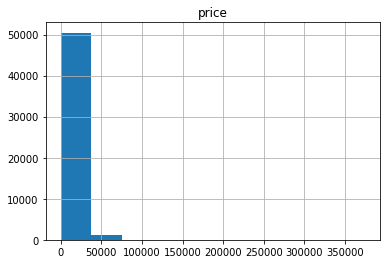

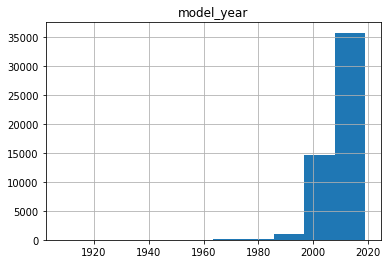

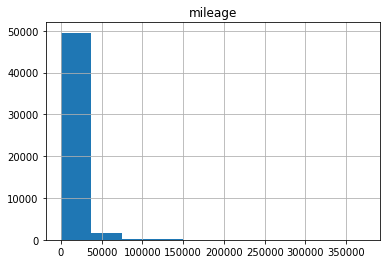

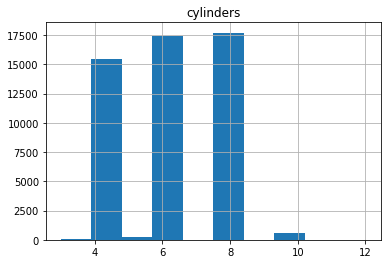

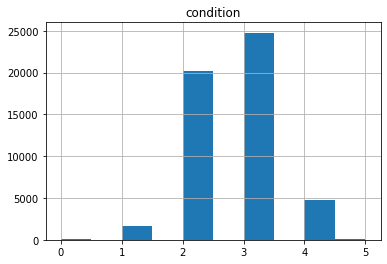

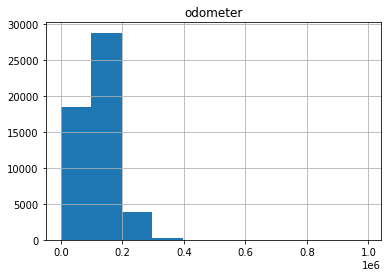

In [81]:
variables = ['price', 'model_year', 'mileage', 'cylinders', 'condition', 'odometer']

for i in range(len(variables)):
    vehicules.hist(variables[i])

Se ajustará el rango y número de contenedores de los histogramas de las variables "price", "model_year" y "odometer". 

Text(0.5, 1.0, 'Price')

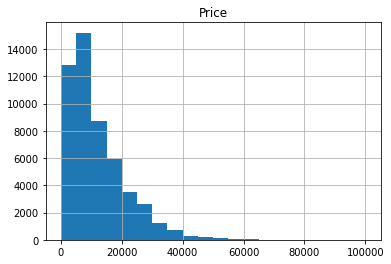

In [82]:
vehicules["price"].hist(bins = 20, range = (0, 100000))
plt.title('Price')

Text(0.5, 1.0, 'Price')

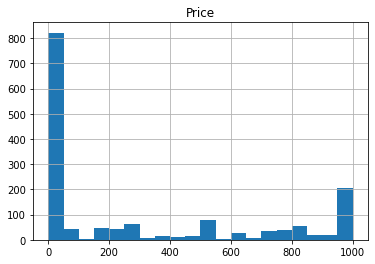

In [83]:
vehicules["price"].hist(bins = 20, range = (0, 1000))
plt.title('Price')

Text(0.5, 1.0, 'Model Year')

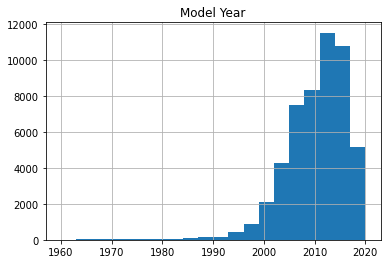

In [84]:
vehicules["model_year"].hist(bins=20, range = (1960, 2020))
plt.title('Model Year')

Text(0.5, 1.0, 'Model Year')

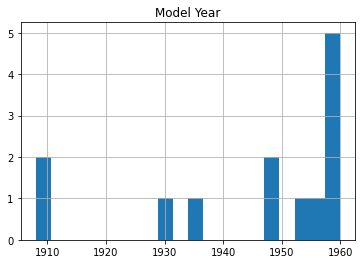

In [85]:
vehicules["model_year"].hist(bins=20, range = (1908, 1960))
plt.title('Model Year')

Text(0.5, 1.0, 'odometer')

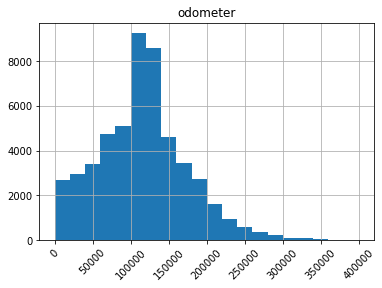

In [88]:
vehicules["odometer"].hist(bins=20, range = (0, 400000), xrot = 45)
plt.title('odometer')

## Diagramas de caja

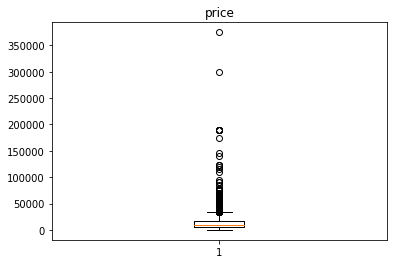

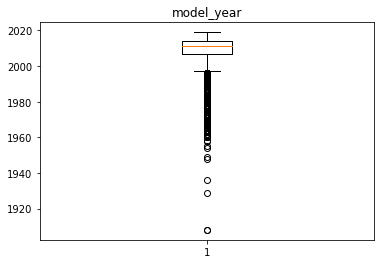

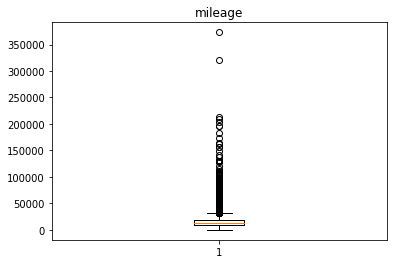

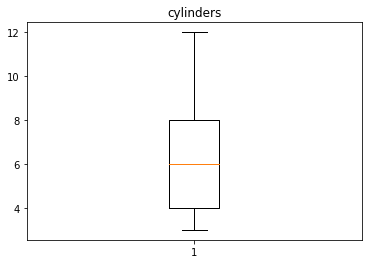

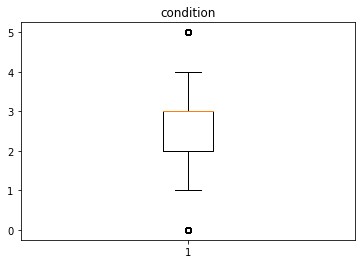

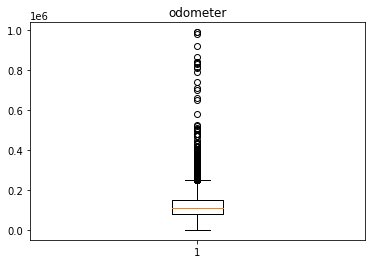

In [89]:
for variable in variables:
    plt.figure()  
    plt.boxplot(vehicules[variable])
    plt.title(variable)

(1.0, 20000.0)

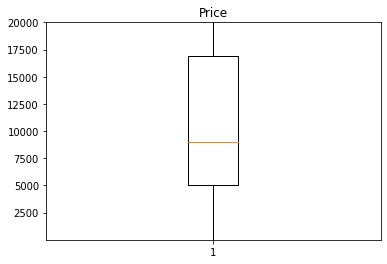

In [114]:
plt.boxplot(vehicules["price"])
plt.title("Price")
plt.ylim([1, 20000])

(1908.0, 1960.0)

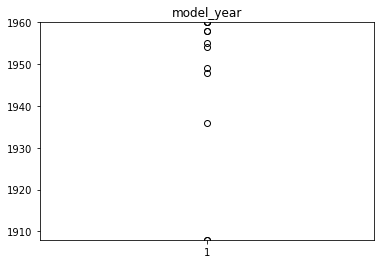

In [115]:
plt.boxplot(vehicules["model_year"])
plt.title("model_year")
plt.ylim([1908, 1960])

(0.0, 400000.0)

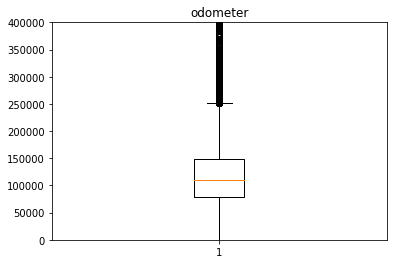

In [90]:
plt.boxplot(vehicules["odometer"])
plt.title("odometer")
plt.ylim([0, 400000])

## Estadísticas generales

In [91]:
for variable in variables:
    print(vehicules[variable].describe())

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
count    51525.000000
mean      2009.871033
std          6.145084
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64
count     51525.000000
mean      15779.226803
std       12436.227296
min           0.000000
25%        9411.000000
50%       13300.000000
75%       18559.000000
max      373200.000000
Name: mileage, dtype: float64
count    51525.000000
mean         6.121494
std          1.657296
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max

## Estudio y tratamiento de valores atípicos

Las columnas "price", "model_year" y "odometer" al parecer tienen valores atípicos.  

In [94]:
# Funciones para el cálculo de límites de valores atípicos 

def lower_limit(Q1,Q3):
    IQR = Q3 -Q1
    lower = Q1 - 1.5*IQR
    return lower

def upper_limit(Q1,Q3):
    IQR = Q3 -Q1
    upper = Q3 + 1.5*IQR
    return upper

In [104]:
# Función para el cáculo de cuantiles

def quantiles(vector):
    Q1 = vector.quantile(0.25)
    Q3 = vector.quantile(0.75)
    return Q1, Q3

In [105]:
# Price quantiles
price = vehicules['price']
quantiles(price)

(5000.0, 16839.0)

In [107]:
# Lower limit price
lower_limit(5000.0,16839.0)

-12758.5

In [108]:
# Upper limit price
upper_limit(5000.0,16839.0)

34597.5

In [110]:
# "model_year" quantiles

model_year = vehicules['model_year']
quantiles(model_year)

(2007.0, 2014.0)

In [111]:
# Lower limit "model_year"
lower_limit(2007.0,2014.0)

1996.5

In [112]:
# Upper limit "model_year"
upper_limit(2007.0,2014.0)

2024.5

In [113]:
# "odometer" quantiles

odometer = vehicules['odometer']
quantiles(odometer)

(79009.0, 147821.0)

In [114]:
# Lower limit "odometer"
lower_limit(79009.0,147821.0)

-24209.0

In [116]:
# Upper limit "odometer"
upper_limit(79009.0,147821.0)

251039.0

In [139]:
# Funciones para el cálculo de porcentajes de valores atípicos a ser eliminados

def atypical_percentages_lower(vector, lower_threshold, dataframe):
    sum_vector = (vector<lower_threshold).sum()
    total_df = dataframe.shape[0]
    percentage = (sum_vector/total_df)*100
    return percentage

def atypical_percentages_upper(vector, upper_threshold, dataframe):
    sum_vector = (vector>upper_threshold).sum()
    total_df = dataframe.shape[0]
    percentage = (sum_vector/total_df)*100
    return percentage

In [136]:
# Porcentaje de datos atípicos a ser eliminados (lower end "price")
atypical_percentages_lower(price, 1000, vehicules)

2.7248908296943233

In [137]:
# Porcentaje de datos atípicos a ser eliminados (lower end "model_year")
atypical_percentages_lower(model_year, 1996, vehicules)

1.9621542940320233

In [140]:
# Porcentaje de datos atípicos a ser eliminados (upper end "price")
atypical_percentages_upper(price, 34725, vehicules)

3.171276079573023

In [141]:
# Porcentaje de datos atípicos a ser eliminados (upper end "odometer")
atypical_percentages_upper(odometer, 251039, vehicules)

1.9893255701115962

In [144]:
# Almacena los datos sin valores atípicos en un DataFrame separado

vehicules_cleaned = vehicules[(vehicules['price'] > 1000)
                              &(vehicules['price'] < 34725)
                             &(vehicules['model_year'] > 1996)
                             &(vehicules['odometer'] < 251039)]
vehicules_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46341 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         46341 non-null  int64         
 1   model_year    46341 non-null  int64         
 2   model         46341 non-null  object        
 3   condition     46341 non-null  int64         
 4   cylinders     46341 non-null  int64         
 5   fuel          46341 non-null  object        
 6   odometer      46341 non-null  int64         
 7   transmission  46341 non-null  object        
 8   type          46341 non-null  object        
 9   paint_color   46341 non-null  object        
 10  is_4wd        46341 non-null  bool          
 11  date_posted   46341 non-null  object        
 12  days_listed   46341 non-null  int64         
 13  timestamp     46341 non-null  datetime64[ns]
 14  year          46341 non-null  int64         
 15  mileage       46341 non-null  int64 

## Estudio de parámetros principales sin valores atípicos

En esta sección se analizarán nuevamente las variables que presentaron datos atípicos.

**Análisis de la variable de precio con datos filtrados**

Text(0.5, 1.0, 'Price')

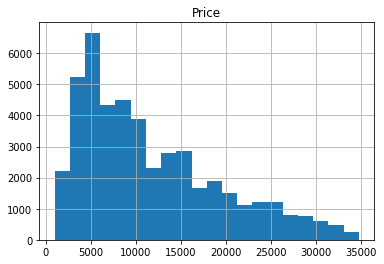

In [145]:
vehicules_cleaned["price"].hist(bins = 20, range = (1000,34725))
plt.title('Price')

Text(0.5, 1.0, 'Price')

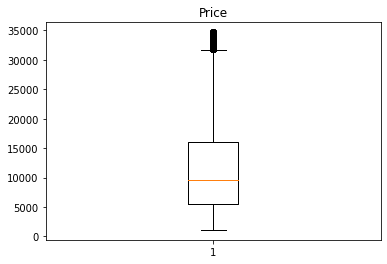

In [146]:
plt.boxplot(vehicules_cleaned["price"])
plt.title("Price")

In [147]:
vehicules_cleaned["price"].describe()

count    46341.000000
mean     11657.690986
std       7710.868248
min       1095.000000
25%       5500.000000
50%       9500.000000
75%      16000.000000
max      34700.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'model_year')

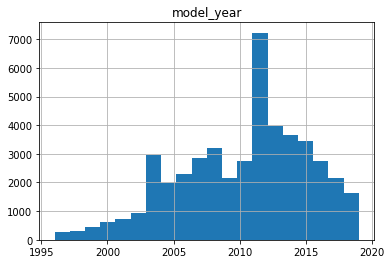

In [148]:
vehicules_cleaned["model_year"].hist(bins = 20, range = (1996,2019))
plt.title('model_year')

Text(0.5, 1.0, 'model_year')

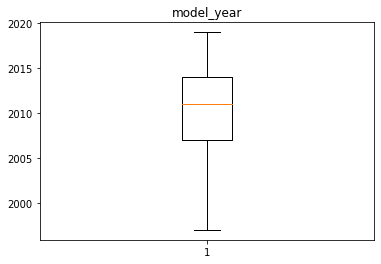

In [149]:
plt.boxplot(vehicules_cleaned["model_year"])
plt.title("model_year")

In [136]:
vehicules_cleaned["model_year"].describe()

count    47157.000000
mean      2010.141040
std          4.900427
min       1997.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Text(0.5, 1.0, 'odometer')

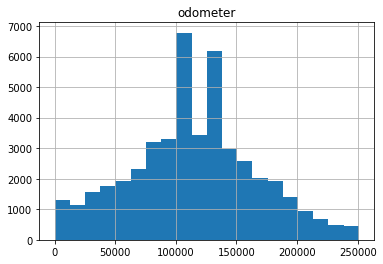

In [150]:
vehicules_cleaned["odometer"].hist(bins = 20, range = (0,251039))
plt.title('odometer')

Text(0.5, 1.0, 'odometer')

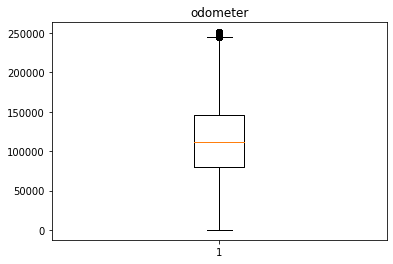

In [151]:
plt.boxplot(vehicules_cleaned["odometer"])
plt.title("odometer")

In [152]:
vehicules_cleaned["odometer"].describe()

count     46341.000000
mean     114343.878121
std       51950.576565
min           0.000000
25%       80000.000000
50%      112253.000000
75%      145850.000000
max      251000.000000
Name: odometer, dtype: float64

## Análisis de período de colocación de los anuncios

Se estudiará cuántos días los anuncios fueron mostrados (`days_listed`). Para este fin, se calcularán la media y la mediana (ademñas de presenarse las estaditicas generales de los datos). Se investigará  cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.

In [153]:
vehicules_cleaned["days_listed"].mean()

39.57683261043137

In [154]:
vehicules_cleaned["days_listed"].median()

33.0

In [155]:
vehicules_cleaned["days_listed"].describe()

count    46341.000000
mean        39.576833
std         28.234022
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Para investigar si existe una relación entre los tiempos de publicación (cortos y largos) y otras variables, en primer lugar se definirán los límites inferior y superior. En principio, se estable a los valores por debajo del primer cuartil como tiempos de publicación rápidos, y los valores mayores al tercer cuartil como tiempos largos.    

In [156]:
(vehicules_cleaned["days_listed"]<19).value_counts()

False    35043
True     11298
Name: days_listed, dtype: int64

In [157]:
(vehicules_cleaned["days_listed"]>53).value_counts()

False    34797
True     11544
Name: days_listed, dtype: int64

In [158]:
days_listed_fast = vehicules_cleaned[(vehicules_cleaned['days_listed'] < 19)] 
                                         

Los valores de los segmentos de publicación rápidos y lentos, se correlacionarán con el resto de variables para tratar de encontrar alguna posible relación de dependencia.

In [159]:
days_listed_fast.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,mileage
price,1.000000,0.557502,0.211870,0.349966,-0.461267,0.351007,0.002728,0.012150,0.202076
model_year,0.557502,1.000000,0.243031,-0.172462,-0.519187,-0.039293,-0.010057,0.011712,0.476644
condition,0.211870,0.243031,1.000000,-0.093701,-0.286870,-0.007822,-0.003804,0.017597,0.005477
cylinders,0.349966,-0.172462,-0.093701,1.000000,0.138995,0.401805,-0.001178,-0.002505,-0.042170
odometer,-0.461267,-0.519187,-0.286870,0.138995,1.000000,0.073639,-0.002829,-0.000802,0.187208
is_4wd,0.351007,-0.039293,-0.007822,0.401805,0.073639,1.000000,-0.003840,0.002076,0.016111
days_listed,0.002728,-0.010057,-0.003804,-0.001178,-0.002829,-0.003840,1.000000,-0.003018,-0.004040
year,0.012150,0.011712,0.017597,-0.002505,-0.000802,0.002076,-0.003018,1.000000,-0.098973
mileage,0.202076,0.476644,0.005477,-0.042170,0.187208,0.016111,-0.004040,-0.098973,1.000000


In [162]:
days_listed_slow = vehicules_cleaned[(vehicules_cleaned['days_listed'] > 53)] 

In [163]:
days_listed_slow.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,mileage
price,1.000000,0.549642,0.184357,0.366012,-0.443181,0.369140,-0.012086,0.003173,0.213969
model_year,0.549642,1.000000,0.229867,-0.162660,-0.500802,-0.037702,-0.001885,0.012126,0.484676
condition,0.184357,0.229867,1.000000,-0.086353,-0.269087,0.007650,-0.003202,-0.001558,0.005054
cylinders,0.366012,-0.162660,-0.086353,1.000000,0.136927,0.417053,-0.005168,0.012525,-0.031858
odometer,-0.443181,-0.500802,-0.269087,0.136927,1.000000,0.077638,0.012919,0.001375,0.189366
is_4wd,0.369140,-0.037702,0.007650,0.417053,0.077638,1.000000,-0.005652,0.004918,0.027091
days_listed,-0.012086,-0.001885,-0.003202,-0.005168,0.012919,-0.005652,1.000000,0.016662,0.002978
year,0.003173,0.012126,-0.001558,0.012525,0.001375,0.004918,0.016662,1.000000,-0.098178
mileage,0.213969,0.484676,0.005054,-0.031858,0.189366,0.027091,0.002978,-0.098178,1.000000


En principio no se aprecia ningua relación entre los segmentos de pubicación rápidos y lentos con otras variables. Se procederá a definir los límites inferior y superior de los tiempos de pubicación de una manera más formal. 

In [164]:
# "days_listed" quantiles
days_listed = vehicules['days_listed']
quantiles(days_listed)

(19.0, 53.0)

In [165]:
# Lower limit "days_listed"
lower_limit(19.0,53.0)

-32.0

In [167]:
# Upper limit "days_listed"
upper_limit(19.0,53.0)

104.0

In [168]:
days_listed_slow = vehicules_cleaned[(vehicules_cleaned['days_listed'] > 104)] 

In [169]:
days_listed_slow.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year,mileage
price,1.000000,0.562504,0.156449,0.353846,-0.439053,0.351530,-0.035013,0.010742,0.222652
model_year,0.562504,1.000000,0.199243,-0.165216,-0.470890,-0.012332,-0.009274,0.018339,0.489972
condition,0.156449,0.199243,1.000000,-0.101120,-0.263847,-0.004386,-0.012166,-0.019179,-0.013791
cylinders,0.353846,-0.165216,-0.101120,1.000000,0.114325,0.388352,-0.026852,-0.009748,-0.059962
odometer,-0.439053,-0.470890,-0.263847,0.114325,1.000000,0.052024,0.030706,-0.047914,0.208150
is_4wd,0.351530,-0.012332,-0.004386,0.388352,0.052024,1.000000,-0.038808,-0.029053,0.014000
days_listed,-0.035013,-0.009274,-0.012166,-0.026852,0.030706,-0.038808,1.000000,0.021878,0.007883
year,0.010742,0.018339,-0.019179,-0.009748,-0.047914,-0.029053,0.021878,1.000000,-0.111311
mileage,0.222652,0.489972,-0.013791,-0.059962,0.208150,0.014000,0.007883,-0.111311,1.000000


Con el cambio de definición de tiempo de publicación (en este caso lento), tampoco se detecta alguna relación con otras varaibles. Finalmente, se investigarán los valores extremos.   

In [170]:
vehicules_cleaned.query("days_listed == 0")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year,mileage
1247,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,True,2018-05-15,0,2018-05-15,2018,8481
1983,14000,1999,ford f250,3,8,diesel,137500,automatic,truck,red,True,2018-09-27,0,2018-09-27,2018,6875
2883,4000,2004,ram 1500,3,8,gas,250000,automatic,truck,brown,True,2018-08-13,0,2018-08-13,2018,16666
4567,5000,2007,toyota corolla,2,4,gas,223000,manual,sedan,silver,False,2018-07-11,0,2018-07-11,2018,18583
4901,12500,2001,ram 1500,2,8,gas,99892,automatic,truck,black,True,2018-05-11,0,2018-05-11,2018,5549
6548,4800,2007,honda odyssey,2,6,gas,152400,automatic,mini-van,brown,False,2018-09-25,0,2018-09-25,2018,12700
7036,5900,2007,jeep grand cherokee laredo,3,6,gas,106687,automatic,SUV,grey,True,2018-07-21,0,2018-07-21,2018,8890
9607,4999,2012,nissan sentra,3,4,gas,125000,automatic,sedan,silver,False,2019-03-26,0,2019-03-26,2019,15625
9732,15000,2003,ford f-150,2,8,gas,90048,automatic,truck,black,False,2018-09-21,0,2018-09-21,2018,5628
10722,3100,2000,chevrolet silverado,2,8,gas,211000,automatic,truck,white,False,2018-07-06,0,2018-07-06,2018,11105


In [171]:
days_listed_fast = vehicules_cleaned[(vehicules_cleaned['days_listed'] == 0)] 

In [172]:
days_listed_fast.pivot_table(index="condition", values = ["price", "mileage"])

,mileage,price
condition,,
1,12193.500000,2350.000000
2,12343.947368,9872.315789
3,16433.619048,11176.047619
4,11042.666667,16182.166667


In [173]:
days_listed_fast.groupby('condition')["condition"].count()

condition
1     2
2    19
3    21
4     6
Name: condition, dtype: int64

In [174]:
vehicules_cleaned.query("days_listed == 271")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year,mileage
4360,5200,2011,chevrolet impala,4,6,gas,122000,automatic,sedan,unknown,False,2018-05-24,271,2018-05-24,2018,15250


## Conclusiones intermedias 

1. Las columnas "price", "model_year", y "odometer" presentaron valores atípicos, los mismos que fueron eliminados de los registros. Esto representó eliminar aproximadamente 9% de los datos (5 % correspondiente a "price", 2 % a "model_year", y " 2 % a "odometer" respectivamente).  

2. Para la variable precio, existe una notable dispersión de los datos a pesar de que los mismos ya fueron filtrados eliminando los valores atípicos. La desviación estándar pasó de 10040 con datos originales a 7710 con datos filtrados. Tanto el histograma como el diagrama de caja muestran que los datos extremos se encuentran sesgados hacia valores por encima de la media (11657 dólares).Como se podría esperar para esta variable, la mayor parte de los datos se encuentran por debajo de la media. 

3. Para la variable "model_year", se aprecia una baja dispersión de los mismos (4 con datos filtrados). La media esta centrada en el año 2010, y los datos extremos tienden a estar agrupados hacia valores por debajo de este año. Lo cual es algo que se puede esperar de esta variable. La mayor parte de los datos se encuentran concentrados en valores por encima de la media, lo cual es algo que también se puede esperar de esta variable. 

4. El tiempo medio de publicación fue de casi 40 días. 

5. Con diferentes definiciones de límites inferior y superior de tiempos de publicación, no se pudo detectar una correlación entre esta y otras variables.

6. Analizando exclusivamente los tiempos extremadamente cortos de publicación (0 días), se aprecia que la mayoría de vehículos corresponden a condiciones "buenas/good/3" (21 vehículos) y "aceptables/fair/2" (19 vehículos). 

7. Para tiempo de publicación extremo largo (271 días) solo se obtuvo un valor, por lo que no se puede analizar. 

# Etapa 4. Análisis de factores de precio <a id='price_factors'></a>

## Precio promedio por cada tipo de vehículo

En esta sección se investigará el precio promedio de cada modelo de vehículo y su relación con el número de anuncios publicados.

In [176]:
mean_price = vehicules_cleaned.groupby("type")['price'].mean()
mean_price = mean_price.to_frame()
mean_price['type'] = mean_price.index
number_ads = vehicules_cleaned.groupby("type")['type'].count()
number_ads = number_ads.to_frame()
number_ads = number_ads.rename(columns={'type':'count'})
number_ads['type'] = number_ads.index
d = {'type': mean_price['type'], 'mean_price': mean_price['price'],'ads_count': number_ads['count']}
price_vs_ads = pd.DataFrame(data=d)
price_vs_ads.sort_values(by = "ads_count", ascending=False)

,type,mean_price,ads_count
type,,,
sedan,sedan,7261.007826,11500
SUV,SUV,10890.035037,11388
truck,truck,15752.378722,10612
pickup,pickup,15398.314851,6114
coupe,coupe,14364.137620,1882
wagon,wagon,9180.435616,1460
mini-van,mini-van,8202.686887,1121
hatchback,hatchback,7082.103306,968
van,van,9289.934783,552


<AxesSubplot:xlabel='mean_price', ylabel='ads_count'>

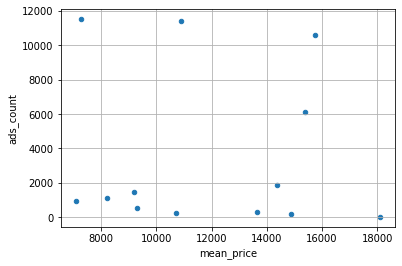

In [177]:
price_vs_ads.plot(x='mean_price', y='ads_count', kind='scatter', grid=True) 

**Conclusiones intermedias precio vs. número de anuncios**

1. Al parecer no existe una relación lineal entre el precio promedio de los vehículos y el número de anuncios. 
2. Los vehículos con mayor cantidad de anuncios son: "sedan" con 11500 anuncios y "SUV" con 11388.  

## Factores de precio

En esta sección se analizarán los factores que más impactan sobre el precio. Para este fin, se analizaran las dos marcas más populares por número de anuncios.     

In [178]:
vehicules_cleaned.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,timestamp,year,mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,2018,18125
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,2018,14784
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,2019,15714
3,1500,2003,ford f-150,1,8,gas,183062,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,2019,10768
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,2019,26967


In [202]:
sedan = vehicules_cleaned.query("type == 'sedan'")
sedan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11500 entries, 2 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         11500 non-null  int64         
 1   model_year    11500 non-null  int64         
 2   model         11500 non-null  object        
 3   condition     11500 non-null  int64         
 4   cylinders     11500 non-null  int64         
 5   fuel          11500 non-null  object        
 6   odometer      11500 non-null  int64         
 7   transmission  11500 non-null  object        
 8   type          11500 non-null  object        
 9   paint_color   11500 non-null  object        
 10  is_4wd        11500 non-null  bool          
 11  date_posted   11500 non-null  object        
 12  days_listed   11500 non-null  int64         
 13  timestamp     11500 non-null  datetime64[ns]
 14  year          11500 non-null  int64         
 15  mileage       11500 non-null  int64 

price vs. odometer, model_year y condition.

<AxesSubplot:xlabel='odometer', ylabel='price'>

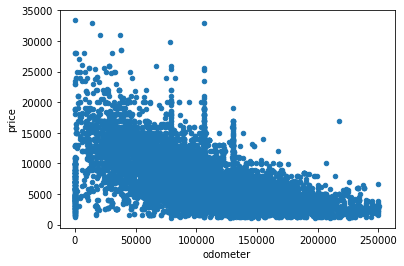

In [205]:
sedan.plot.scatter(x='odometer',y='price') 

<AxesSubplot:xlabel='odometer', ylabel='price'>

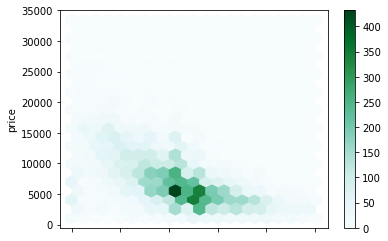

In [210]:
sedan.plot.hexbin(x='odometer', y='price', gridsize=20)

<AxesSubplot:xlabel='model_year', ylabel='condition'>

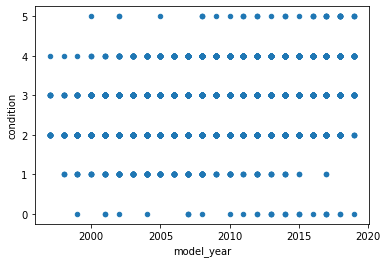

In [213]:
sedan.plot.scatter(x='model_year',y='condition') 

<AxesSubplot:xlabel='model_year', ylabel='condition'>

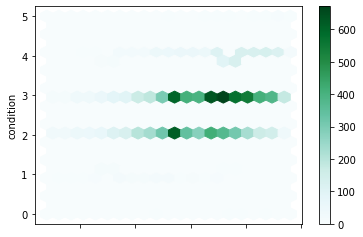

In [215]:
sedan.plot.hexbin(x='model_year',y='condition', gridsize=20)

In [185]:
sedan.corr()

,price,model_year,condition,cylinders,odometer,days_listed,year,mileage
price,1.000000,0.678897,0.313000,0.005344,-0.582066,0.001472,0.014684,0.254955
model_year,0.678897,1.000000,0.264296,-0.187806,-0.526796,0.000463,0.022774,0.481234
condition,0.313000,0.264296,1.000000,-0.072407,-0.333440,-0.010797,0.012321,0.012701
cylinders,0.005344,-0.187806,-0.072407,1.000000,0.121128,-0.002578,-0.003323,-0.084022
odometer,-0.582066,-0.526796,-0.333440,0.121128,1.000000,0.007789,-0.010664,0.198825
days_listed,0.001472,0.000463,-0.010797,-0.002578,0.007789,1.000000,0.012879,0.010581
year,0.014684,0.022774,0.012321,-0.003323,-0.010664,0.012879,1.000000,-0.118335
mileage,0.254955,0.481234,0.012701,-0.084022,0.198825,0.010581,-0.118335,1.000000


In [186]:
sedan['transmission'].value_counts()

automatic    10886
manual         540
other           74
Name: transmission, dtype: int64

In [187]:
sedan = sedan.query("transmission != 'other'")
sedan['transmission'].value_counts()

automatic    10886
manual         540
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

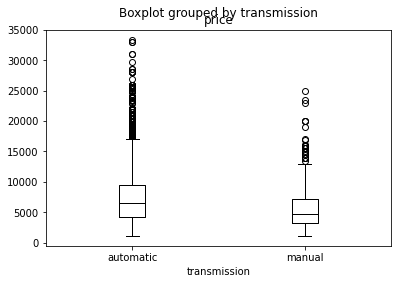

In [188]:
sedan.boxplot(column=['price'], by='transmission', grid=False, color='black')

In [189]:
sedan['paint_color'].value_counts()

unknown    2030
silver     1950
black      1693
grey       1567
white      1406
blue       1165
red         878
custom      256
brown       246
green       188
purple       21
yellow       18
orange        8
Name: paint_color, dtype: int64

In [190]:
sedan = sedan.query("paint_color not in ['yellow', 'orange','purple']")
sedan['paint_color'].value_counts()

unknown    2030
silver     1950
black      1693
grey       1567
white      1406
blue       1165
red         878
custom      256
brown       246
green       188
Name: paint_color, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

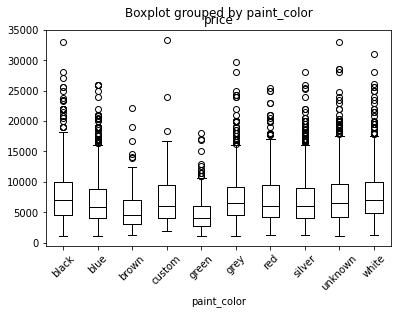

In [191]:
sedan.boxplot(column=['price'], by='paint_color', grid=False, color='black', rot=45)

In [203]:
SUV = vehicules_cleaned.query("type == 'SUV'")
SUV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11388 entries, 0 to 51516
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         11388 non-null  int64         
 1   model_year    11388 non-null  int64         
 2   model         11388 non-null  object        
 3   condition     11388 non-null  int64         
 4   cylinders     11388 non-null  int64         
 5   fuel          11388 non-null  object        
 6   odometer      11388 non-null  int64         
 7   transmission  11388 non-null  object        
 8   type          11388 non-null  object        
 9   paint_color   11388 non-null  object        
 10  is_4wd        11388 non-null  bool          
 11  date_posted   11388 non-null  object        
 12  days_listed   11388 non-null  int64         
 13  timestamp     11388 non-null  datetime64[ns]
 14  year          11388 non-null  int64         
 15  mileage       11388 non-null  int64 

<AxesSubplot:xlabel='odometer', ylabel='price'>

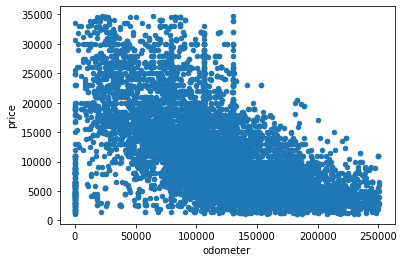

In [211]:
SUV.plot.scatter(x='odometer',y='price') 

<AxesSubplot:xlabel='odometer', ylabel='price'>

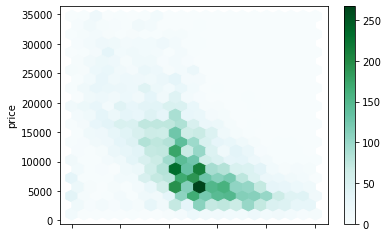

In [212]:
SUV.plot.hexbin(x='odometer', y='price', gridsize=20)

<AxesSubplot:xlabel='model_year', ylabel='condition'>

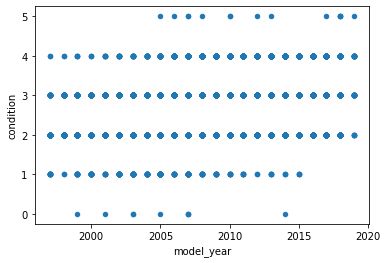

In [216]:
SUV.plot.scatter(x='model_year',y='condition') 

<AxesSubplot:xlabel='model_year', ylabel='condition'>

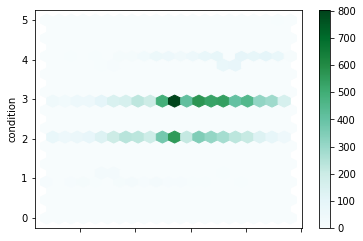

In [217]:
SUV.plot.hexbin(x='model_year',y='condition', gridsize=20)

In [195]:
SUV.corr()

,price,model_year,condition,cylinders,odometer,days_listed,year,mileage
price,1.000000,0.647935,0.280786,0.034466,-0.569423,-0.022031,0.000014,0.232585
model_year,0.647935,1.000000,0.272995,-0.313025,-0.535697,-0.012867,0.010754,0.512403
condition,0.280786,0.272995,1.000000,-0.105099,-0.321678,-0.011375,-0.001171,0.019952
cylinders,0.034466,-0.313025,-0.105099,1.000000,0.252240,0.014805,-0.005936,-0.143631
odometer,-0.569423,-0.535697,-0.321678,0.252240,1.000000,0.010368,-0.007009,0.144593
days_listed,-0.022031,-0.012867,-0.011375,0.014805,0.010368,1.000000,0.000135,-0.010130
year,0.000014,0.010754,-0.001171,-0.005936,-0.007009,0.000135,1.000000,-0.107933
mileage,0.232585,0.512403,0.019952,-0.143631,0.144593,-0.010130,-0.107933,1.000000


In [196]:
SUV['transmission'].value_counts()

automatic    10852
manual         444
other           92
Name: transmission, dtype: int64

In [197]:
SUV = SUV.query("transmission != 'other'")
SUV['transmission'].value_counts()

automatic    10852
manual         444
Name: transmission, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

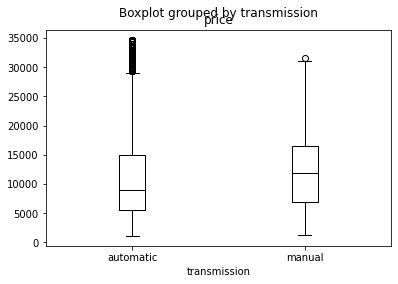

In [198]:
SUV.boxplot(column=['price'], by='transmission', grid=False, color='black')

In [199]:
SUV['paint_color'].value_counts()

unknown    2028
black      1963
white      1792
silver     1467
grey       1109
blue        960
red         832
green       375
brown       344
custom      267
orange       79
yellow       44
purple       36
Name: paint_color, dtype: int64

In [200]:
SUV = SUV.query("paint_color not in ['yellow', 'orange','purple']")
SUV['paint_color'].value_counts()

unknown    2028
black      1963
white      1792
silver     1467
grey       1109
blue        960
red         832
green       375
brown       344
custom      267
Name: paint_color, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

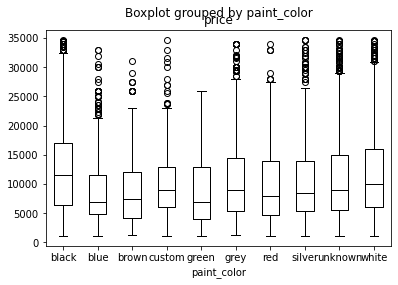

In [201]:
SUV.boxplot(column=['price'], by='paint_color', grid=False, color='black')

## Etapa 5. Conclusión intermedia

1. En los dos casos estudiados existe consenso con respecto a que los factores que determinan el precio de los vehículos, en orden de importancia por la fuerza de la correlación, son: 1) Años del vehículo (correlación positiva), 2) Recorrido del vehículo (correlación negativa) y 3) Condición (correlación positiva).

2. Para variables categóricas también existe consenso entre los casos estudiados. Los vehículos de transmisión automática y de color gris y negro son los que presentan un precio más elevado (medido por la mediana).

3. Como se podría esperar, el precio decrece con el aumento del recorrido.

4. Algo inesperado, es que no existe un relación lineal entre el año del vehículo y su condición. La mayor parte de de vehículos tienen  una condición "buena" y "excelente" .

# Etapa 5. Conclusión general<a id='end'></a>

1. La principal estrategia de tratamiento de datos fue el relleno usando la moda estadística. Esto se aplicó para los campos "cylinders", "paint_color" y "model_year". El uso del valor más común para el relleno de estos campos tiene sentido porque cuanto existen valores categóricos ("paint_color") y para los otros dos campos la media y mediana no son los valores representativos. Por el contrario, para el parámetro "odometer" se utilizó la media en virtud de que no existen para esta variable valores atípicos.  

2. Las columnas "price" y "model_year" presentaron valores atípicos, los mismos que fueron eliminados de los registros. Esto representó eliminar aproximadamente 7% de los datos (5 % correspondiente a "price" y 2 % a "model_year" respectivamente).

3. En los dos casos estudiados existe consenso con respecto a que los factores que determinan el precio de los vehículos, en orden de importancia por la fuerza de la correlación, son: 1) Años del vehículo (correlación positiva), 2) Recorrido del vehículo (correlación negativa) y 3) Condición (correlación positiva).

4. Para variables categóricas también existe consenso entre los casos estudiados. Los vehículos de transmisión automática y de colores negro y gris son los que presentan un precio más elevado (medido por la mediana).

5. Como se podría esperar, el precio decrece con el aumento del recorrido.

6. Algo inesperado, es que no existe un relación lineal entre el año del vehículo y su condición. La mayor parte de de vehículos tienen una condición "buena" y "excelente" .